In [1]:
import glob
import matplotlib.pyplot as plt
import torch
from vqvae import VQVAE
from PIL import Image

In [2]:
state = torch.load('./runs/celeba/checkpoints/vqvae_celeba_step_82300.pt')
state.keys()

dict_keys(['model', 'opt', 'step', 'hyper_parameters'])

In [3]:
device = 'cpu'
hyper_parameters = state['hyper_parameters']
print(hyper_parameters)
vqvae = VQVAE(**hyper_parameters).to(device)
vqvae.load_state_dict(state['model'])
vqvae.eval()

{'batch_size': 128, 'num_training_updates': 15000, 'input_dim': 3, 'hidden_dim': 256, 'dim_residual_layer': 32, 'num_residual_layer': 8, 'embedding_dim': 128, 'codebook_size': 512, 'commitment_cost': 0.25, 'decay': 0.99, 'learning_rate': 0.001}


VQVAE(
  (encoder): Encoder(
    (conv_stack): Sequential(
      (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (residual_stack): Sequential(
      (0): ResBlock(
        (block): Sequential(
          (0): ReLU(inplace=True)
          (1): Conv2d(256, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): ReLU(inplace=True)
          (4): Conv2d(32, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (5): BatchNorm2d(256, eps=1

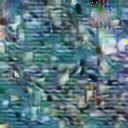

In [4]:
import torchvision.transforms as TF
from torch.nn.functional import embedding

random_latents = torch.randint(0, 512, (32, 32)).to(device)
random_embeds = embedding(random_latents, vqvae.vq._codebook.embed)
TF.ToPILImage()(vqvae.decode(random_embeds.unsqueeze(0)).squeeze(0))

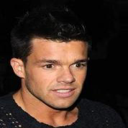

In [5]:
import glob
import random
data_path = glob.glob('/home/lleonard/Documents/datasets/img_align_celeba/img_align_celeba/*.jpg')
image_path = data_path[random.randint(0, len(data_path))]

image = Image.open(image_path).resize((128, 128))
image_tensor = TF.ToTensor()(image).to(device)
TF.ToPILImage()(image_tensor)

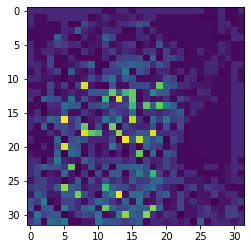

In [6]:
from matplotlib import pyplot as plt
_, indices = vqvae.encode(image_tensor.unsqueeze(0))
plt.imshow(indices.cpu()[0])

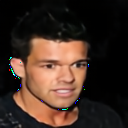

In [7]:
embeds = embedding(indices, vqvae.vq._codebook.embed)
TF.ToPILImage()(vqvae.decode(embeds).squeeze(0))

In [11]:
latent = torch.load('../data/celeba_latents/0.pt', map_location=device)
latent

tensor([[[412,  52,  75,  ..., 185, 125, 171],
         [120, 109,  75,  ...,  25,  48,  29],
         [ 52, 109, 120,  ...,  96,  45,  29],
         ...,
         [ 42,  23, 115,  ...,  55,  77, 102],
         [223, 136, 162,  ...,  86, 169,  80],
         [197,  79,  88,  ...,  79, 136,  49]],

        [[ 98,  58,  36,  ...,  13,  85,  47],
         [148,  47, 101,  ...,   9,  47,   0],
         [ 64,  88,  58,  ..., 101,  15,  31],
         ...,
         [  7,  68, 199,  ...,  13, 151, 387],
         [ 88,  78, 412,  ..., 192,  15,   1],
         [129, 387,  71,  ..., 152,  88, 464]],

        [[128, 128, 171,  ..., 243, 243,  43],
         [128, 128, 171,  ..., 410, 410,  38],
         [ 29,  39, 421,  ..., 171, 118, 118],
         ...,
         [ 12,  54, 104,  ..., 435,  13,  71],
         [  9,  12,  36,  ...,  47,  46,  13],
         [101,  65, 101,  ..., 123, 487,  31]],

        ...,

        [[ 25, 121,  81,  ...,  96,  98,  17],
         [ 88, 194, 487,  ...,   0,  74, 107]

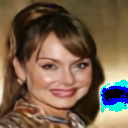

In [12]:
images = vqvae.decode(embedding(latent, vqvae.vq._codebook.embed))
TF.ToPILImage()(images[8])